In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [135]:
class Model(object):
    def __init__(self, mx1, mx2, ce, cm, lam):
        self._mx1 = mx1
        self._mx2 = mx2
        self._ce = ce
        self._cm = cm
        self._lam = lam
        
        self._width_x2 = None
        self.__compute_width_x2()
    
    def __compute_width_x2(self):
        if self.mx2 > self.mx1:
            self._width_x2 = (((self.ce**2 + self.cm**2)*
                             (self.mx1**2 - self.mx2**2)**2*
                             np.sqrt((-self.mx1**2 + self.mx2**2)**2/self.mx2**2))/
                            (8.*self.lam**2*self.mx2**2*np.pi))
        else:
            self._width_x2=0.0
    
    @property
    def mx1(self):
        return self._mx1
    
    @mx1.setter
    def mx1(self, val):
        self._mx1 = val
        self.__compute_width_x2()
    
    @property
    def mx2(self):
        return self._mx2
    
    @mx2.setter
    def mx2(self, val):
        self._mx2 = val
        self.__compute_width_x2()
        
    @property
    def ce(self):
        return self._ce
    
    @ce.setter
    def ce(self, val):
        self._ce = val
        self.__compute_width_x2()
        
    @property
    def cm(self):
        return self._cm
    
    @cm.setter
    def cm(self, val):
        self._cm = val
        self.__compute_width_x2()
        
    @property
    def lam(self):
        return self._lam
    
    @lam.setter
    def lam(self, val):
        self._lam = val
        self.__compute_width_x2()
        
    @property
    def width_x2(self):
        return self._width_x2
    
    def gamma_integrand(self, w, T):
        return -(
            (self.ce ** 2 + self.cm ** 2) ** 2
            * (1 + 1 / (-1 + np.exp(w / T)))
            * (
                (
                    -4
                    * self.mx1 ** 2
                    * w ** 2
                    * (
                        self.mx1 ** 12
                        * (self.mx1 ** 2 + 2 * self.mx2 ** 2 + 2 * self.mx1 * w)
                        - 2
                        * self.mx1 ** 10
                        * (self.mx1 ** 2 + 2 * self.mx1 * w)
                        * (5 * self.mx2 ** 2 + 4 * (self.mx1 ** 2 + 2 * self.mx1 * w))
                        + self.mx1 ** 8
                        * (
                            2 * self.mx2 ** 6
                            + 36 * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 3
                            - self.mx2 ** 4
                            * (self.mx1 ** 2 - 2 * self._width_x2 ** 2 + 2 * self.mx1 * w)
                            + self.mx2 ** 2
                            * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            * (
                                self._width_x2 ** 2
                                + 8 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            )
                        )
                        - 2
                        * self.mx1 ** 6
                        * (self.mx1 ** 2 + 2 * self.mx1 * w)
                        * (
                            7 * self.mx2 ** 6
                            + 12 * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 3
                            + self.mx2 ** 4
                            * (
                                7 * self._width_x2 ** 2
                                - 2 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            )
                            + self.mx2 ** 2
                            * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            * (
                                8 * self._width_x2 ** 2
                                + 13 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            )
                        )
                        + self.mx1 ** 4
                        * (self.mx1 ** 2 + 2 * self.mx1 * w)
                        * (
                            6 * self.mx2 ** 8
                            - 13 * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 4
                            + 6
                            * self.mx2 ** 4
                            * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            * (
                                9 * self._width_x2 ** 2
                                - 17 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            )
                            + 6
                            * self.mx2 ** 6
                            * (
                                self._width_x2 ** 2
                                + 9 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            )
                            + 4
                            * self.mx2 ** 2
                            * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2
                            * (
                                -12 * self._width_x2 ** 2
                                + 25 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            )
                        )
                        - 2
                        * self.mx1 ** 2
                        * self.mx2 ** 2
                        * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2
                        * (
                            30 * self.mx2 ** 6
                            + 4
                            * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2
                            * (self.mx1 ** 2 - self._width_x2 ** 2 + 2 * self.mx1 * w)
                            + self.mx2 ** 4
                            * (
                                30 * self._width_x2 ** 2
                                - 77 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            )
                            + self.mx2 ** 2
                            * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            * (
                                -5 * self._width_x2 ** 2
                                + 52 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            )
                        )
                        + (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2
                        * (
                            18 * self.mx2 ** 10
                            + 7
                            * self.mx2 ** 2
                            * self._width_x2 ** 2
                            * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 3
                            + 2 * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 5
                            + 12
                            * self.mx2 ** 8
                            * (
                                self._width_x2 ** 2
                                - 4 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            )
                            + self.mx2 ** 6
                            * (
                                -6 * self._width_x2 ** 4
                                + 54
                                * self._width_x2 ** 2
                                * (self.mx1 ** 2 + 2 * self.mx1 * w)
                                + 8 * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2
                            )
                            + self.mx2 ** 4
                            * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            * (
                                6 * self._width_x2 ** 4
                                - 16
                                * self._width_x2 ** 2
                                * (self.mx1 ** 2 + 2 * self.mx1 * w)
                                + 23 * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2
                            )
                        )
                    )
                )
                / (self.mx1 ** 2 + 2 * self.mx1 * w) ** 3
                + (
                    6
                    * (
                        self.mx2 ** 6
                        * self._width_x2 ** 6
                        * (self.mx1 ** 2 - self.mx2 ** 2 + 2 * self.mx1 * w)
                        - (self.mx1 ** 2 - self.mx2 ** 2) ** 4
                        * (-self.mx1 ** 2 + self.mx2 ** 2 - 2 * self.mx1 * w) ** 2
                        * (-self.mx1 ** 2 + self.mx2 ** 2 + 2 * self.mx1 * w)
                        + self.mx2 ** 4
                        * self._width_x2 ** 4
                        * (
                            -6 * self.mx1 ** 6
                            + 5 * self.mx2 ** 6
                            + 11 * self.mx2 ** 4 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            - 3 * self.mx2 ** 2 * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2
                            + (self.mx1 ** 2 + 2 * self.mx1 * w) ** 3
                            + 2
                            * self.mx1 ** 4
                            * (7 * self.mx2 ** 2 - 6 * (self.mx1 ** 2 + 2 * self.mx1 * w))
                            + self.mx1 ** 2
                            * (
                                -18 * self.mx2 ** 4
                                + 4 * self.mx2 ** 2 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                                + 4 * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2
                            )
                        )
                        + self.mx2 ** 2
                        * self._width_x2 ** 2
                        * (
                            10 * self.mx1 ** 10
                            - self.mx1 ** 8
                            * (self.mx1 ** 2 + 17 * self.mx2 ** 2 + 2 * self.mx1 * w)
                            + 2
                            * self.mx1 ** 6
                            * (self.mx2 ** 4 + (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2)
                            + 2
                            * self.mx1 ** 4
                            * (
                                4 * self.mx2 ** 6
                                - 15 * self.mx2 ** 4 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                                + 15
                                * self.mx2 ** 2
                                * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2
                                - 6 * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 3
                            )
                            + self.mx2 ** 4
                            * (
                                5 * self.mx2 ** 6
                                - 21 * self.mx2 ** 4 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                                - 2
                                * self.mx2 ** 2
                                * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2
                                + 8 * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 3
                            )
                            - 2
                            * self.mx1 ** 2
                            * (
                                6 * self.mx2 ** 8
                                - 30 * self.mx2 ** 6 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                                + 15
                                * self.mx2 ** 4
                                * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2
                                + 2
                                * self.mx2 ** 2
                                * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 3
                                - 2 * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 4
                            )
                        )
                    )
                    * np.arctan(
                        (-self.mx1 ** 2 + self.mx2 ** 2 + 2 * self.mx1 * w)
                        /(self.mx2 * self._width_x2)
                    )
                    + 6
                    * (
                        self.mx2 ** 6
                        * self._width_x2 ** 6
                        * (self.mx1 ** 2 - self.mx2 ** 2 + 2 * self.mx1 * w)
                        - (self.mx1 ** 2 - self.mx2 ** 2) ** 4
                        * (-self.mx1 ** 2 + self.mx2 ** 2 - 2 * self.mx1 * w) ** 2
                        * (-self.mx1 ** 2 + self.mx2 ** 2 + 2 * self.mx1 * w)
                        + self.mx2 ** 4
                        * self._width_x2 ** 4
                        * (
                            -6 * self.mx1 ** 6
                            + 5 * self.mx2 ** 6
                            + 11 * self.mx2 ** 4 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            - 3 * self.mx2 ** 2 * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2
                            + (self.mx1 ** 2 + 2 * self.mx1 * w) ** 3
                            + 2
                            * self.mx1 ** 4
                            * (7 * self.mx2 ** 2 - 6 * (self.mx1 ** 2 + 2 * self.mx1 * w))
                            + self.mx1 ** 2
                            * (
                                -18 * self.mx2 ** 4
                                + 4 * self.mx2 ** 2 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                                + 4 * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2
                            )
                        )
                        + self.mx2 ** 2
                        * self._width_x2 ** 2
                        * (
                            10 * self.mx1 ** 10
                            - self.mx1 ** 8
                            * (self.mx1 ** 2 + 17 * self.mx2 ** 2 + 2 * self.mx1 * w)
                            + 2
                            * self.mx1 ** 6
                            * (self.mx2 ** 4 + (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2)
                            + 2
                            * self.mx1 ** 4
                            * (
                                4 * self.mx2 ** 6
                                - 15 * self.mx2 ** 4 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                                + 15
                                * self.mx2 ** 2
                                * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2
                                - 6 * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 3
                            )
                            + self.mx2 ** 4
                            * (
                                5 * self.mx2 ** 6
                                - 21 * self.mx2 ** 4 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                                - 2
                                * self.mx2 ** 2
                                * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2
                                + 8 * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 3
                            )
                            - 2
                            * self.mx1 ** 2
                            * (
                                6 * self.mx2 ** 8
                                - 30 * self.mx2 ** 6 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                                + 15
                                * self.mx2 ** 4
                                * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2
                                + 2
                                * self.mx2 ** 2
                                * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 3
                                - 2 * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 4
                            )
                        )
                    )
                    * np.arctan(
                        (
                            self.mx1 ** 4
                            - self.mx2 ** 2 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                        ) / 
                        (self.mx2 * self._width_x2 * (self.mx1 ** 2 + 2 * self.mx1 * w))

                    )
                    + 3
                    * self.mx2
                    * self._width_x2
                    * (
                        4 * self.mx2 ** 12
                        + 8
                        * self.mx1 ** 10
                        * (-self.mx1 ** 2 + self.mx2 ** 2 - 2 * self.mx1 * w)
                        - 8 * self.mx2 ** 10 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                        + self.mx2 ** 2
                        * self._width_x2 ** 2
                        * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 4
                        + self.mx2 ** 4
                        * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2
                        * (self.mx1 ** 2 - self._width_x2 ** 2 + 2 * self.mx1 * w) ** 2
                        + 2
                        * self.mx2 ** 6
                        * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2
                        * (-self._width_x2 ** 2 + 3 * (self.mx1 ** 2 + 2 * self.mx1 * w))
                        + self.mx2 ** 8
                        * (
                            -4 * self._width_x2 ** 4
                            + 24
                            * self._width_x2 ** 2
                            * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            - 3 * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2
                        )
                        + self.mx1 ** 8
                        * (
                            5 * self.mx2 ** 4
                            + 13 * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2
                            + self.mx2 ** 2
                            * (
                                13 * self._width_x2 ** 2
                                - 18 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            )
                        )
                        - 2
                        * self.mx1 ** 6
                        * (
                            13 * self.mx2 ** 6
                            + (self.mx1 ** 2 + 2 * self.mx1 * w) ** 3
                            + 3
                            * self.mx2 ** 2
                            * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            * (self.mx1 ** 2 - self._width_x2 ** 2 + 2 * self.mx1 * w)
                            + self.mx2 ** 4
                            * (
                                9 * self._width_x2 ** 2
                                - 17 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            )
                        )
                        - 2
                        * self.mx1 ** 2
                        * self.mx2 ** 2
                        * (
                            9 * self.mx2 ** 8
                            + self.mx2 ** 6
                            * (
                                6 * self._width_x2 ** 2
                                - 19 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            )
                            + (self.mx1 ** 2 + 2 * self.mx1 * w) ** 3
                            * (
                                3 * self._width_x2 ** 2
                                - 2 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            )
                            + self.mx2 ** 4
                            * (
                                -3 * self._width_x2 ** 4
                                + 16
                                * self._width_x2 ** 2
                                * (self.mx1 ** 2 + 2 * self.mx1 * w)
                                + 5 * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2
                            )
                            + self.mx2 ** 2
                            * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            * (
                                3 * self._width_x2 ** 4
                                - 11
                                * self._width_x2 ** 2
                                * (self.mx1 ** 2 + 2 * self.mx1 * w)
                                + 7 * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2
                            )
                        )
                        + self.mx1 ** 4
                        * (
                            31 * self.mx2 ** 8
                            - (self.mx1 ** 2 + 2 * self.mx1 * w) ** 4
                            + self.mx2 ** 6
                            * (
                                22 * self._width_x2 ** 2
                                - 54 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            )
                            - 2
                            * self.mx2 ** 2
                            * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2
                            * (
                                self._width_x2 ** 2
                                + 3 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            )
                            + self.mx2 ** 4
                            * (
                                -self._width_x2 ** 4
                                - 14
                                * self._width_x2 ** 2
                                * (self.mx1 ** 2 + 2 * self.mx1 * w)
                                + 30 * (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2
                            )
                        )
                    )
                    * np.log(
                        (
                            self.mx2 ** 2 * self._width_x2 ** 2
                            + (-self.mx1 ** 2 + self.mx2 ** 2 + 2 * self.mx1 * w) ** 2
                        )
                        / (
                            self.mx2 ** 2 * self._width_x2 ** 2
                            + (
                                self.mx1 ** 4
                                - self.mx2 ** 2 * (self.mx1 ** 2 + 2 * self.mx1 * w)
                            )
                            ** 2
                            / (self.mx1 ** 2 + 2 * self.mx1 * w) ** 2
                        )
                    )
                )
                / (self.mx2 * self._width_x2)
            )
        ) / (
            24.0
            * (-1 + np.exp(w / T))
            * self.lam ** 4
            * (
                self.mx2 ** 2 * self._width_x2 ** 2
                + (-self.mx1 ** 2 + self.mx2 ** 2 - 2 * self.mx1 * w) ** 2
            )
        )
    
    def gamma_integrand_s_only(self, w, T):
        return (
            8
            * (self.ce ** 2 + self.cm ** 2) ** 2
            * self.mx1 ** 5
            * w ** 8
            * (self.mx1 ** 2 + 2 * self.mx2 ** 2 + 2 * self.mx1 * w)
            / np.sinh(w / (2.0 * T)) ** 2
        ) / (
            3.0
            * self.lam ** 4
            * (self.mx1 + 2 * w) ** 3
            * (
                self.mx1 ** 4
                + self.mx2 ** 2 * (self.mx2 ** 2 + self._width_x2 ** 2)
                + 4 * self.mx1 ** 3 * w
                - 4 * self.mx1 * self.mx2 ** 2 * w
                - 2 * self.mx1 ** 2 * (self.mx2 ** 2 - 2 * w ** 2)
            )
        )
    
    def gamma(self,T,s_only=True):
        integrand = (lambda w: self.gamma_integrand_s_only(w,T)) if s_only else (lambda w: self.gamma_integrand(w,T))
        
        if self.mx2 > self.mx1:
            brk = self.mx2 - self.mx1
            return (quad(integrand, 0.0, brk, limit=500, points=[0.0,brk], epsabs=0.0, epsrel=1e-3)[0]+
                quad(integrand, brk, np.inf, limit=500, epsabs=0.0, epsrel=1e-3)[0])/ (48.0 * np.pi**3 * 2.0 * self.mx1**3 * T)
        else:
            return quad(integrand, brk, np.inf, limit=500, epsabs=0.0, epsrel=1e-3)[0]/ (48.0 * np.pi**3 * 2.0 * self.mx1**3 * T)

In [132]:
model = Model(100.0, 101.0, 1.0, 1.0, 1e4)

In [133]:
model.width_x2

6.272117517244904e-09

In [134]:
xs = np.logspace(-1,3,num=150)
gammas1 = np.array([model.gamma(model.mx1 /x) for x in xs])
gammas2 = np.array([model.gamma(model.mx1 /x, s_only=False) for x in xs])

/Users/loganmorrison/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:496: RuntimeWarning: overflow encountered in double_scalars
/Users/loganmorrison/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:496: RuntimeWarning: overflow encountered in sinh
/Users/loganmorrison/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:506: RuntimeWarning: divide by zero encountered in double_scalars
/Users/loganmorrison/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:515: IntegrationWarning: The integral is probably divergent, or slowly convergent.
/Users/loganmorrison/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: overflow encountered in exp
/Users/loganmorrison/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:483: RuntimeWarning: overflow encountered in exp
/Users/loganmorrison/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launc

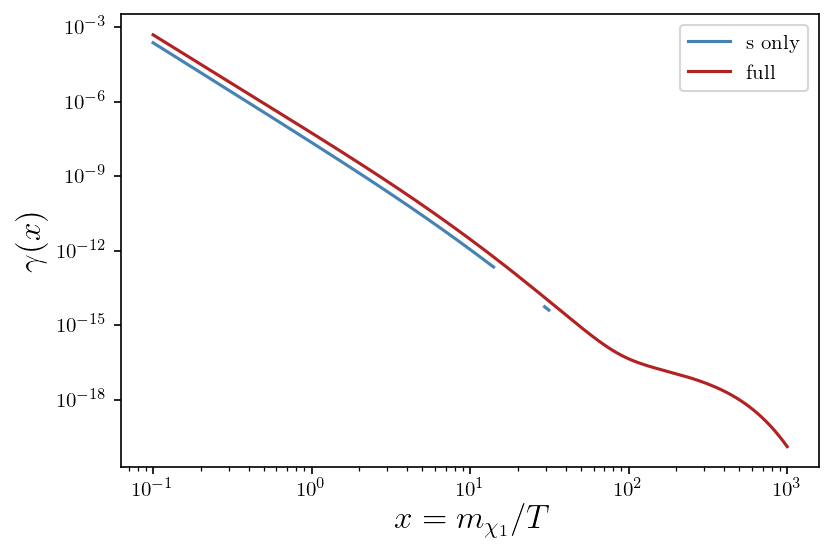

In [136]:
plt.figure(dpi=150)
ymax = np.max(np.abs(gammas))*5
ymin = np.min(np.abs(gammas))*0.5

plt.plot(xs, np.abs(gammas1),label='s only')
plt.plot(xs, np.abs(gammas2),label='full')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$x = m_{\chi_1}/T$',fontsize=16)
plt.ylabel(r'$\gamma(x)$',fontsize=16)
plt.legend()

In [3]:
arr = np.array([
[0.1, 3.11797],
[0.100694, 3.09648],
[0.101393, 3.07515],
[0.102096, 3.05395],
[0.102804, 3.03291],
[0.103518, 3.01201],
[0.104236, 2.99125],
[0.104959, 2.97064],
[0.105688, 2.95017],
[0.106421, 2.92984],
[0.107159, 2.90965],
[0.107903, 2.8896],
[0.108652, 2.86969],
[0.109405, 2.84991],
[0.110165, 2.83028],
[0.110929, 2.81077],
[0.111699, 2.7914],
[0.112474, 2.77217],
[0.113254, 2.75307],
[0.11404, 2.73409],
[0.114831, 2.71525],
[0.115628, 2.69654],
[0.11643, 2.67796],
[0.117238, 2.65951],
[0.118052, 2.64118],
[0.118871, 2.62298],
[0.119696, 2.6049],
[0.120526, 2.58695],
[0.121362, 2.56913],
[0.122204, 2.55142],
[0.123052, 2.53384],
[0.123906, 2.51638],
[0.124766, 2.49904],
[0.125632, 2.48182],
[0.126503, 2.46472],
[0.127381, 2.44773],
[0.128265, 2.43087],
[0.129155, 2.41411],
[0.130051, 2.39748],
[0.130954, 2.38096],
[0.131862, 2.36455],
[0.132777, 2.34826],
[0.133698, 2.33207],
[0.134626, 2.316],
[0.13556, 2.30004],
[0.136501, 2.28419],
[0.137448, 2.26845],
[0.138402, 2.25282],
[0.139362, 2.2373],
[0.140329, 2.22188],
[0.141303, 2.20657],
[0.142283, 2.19136],
[0.14327, 2.17626],
[0.144264, 2.16126],
[0.145265, 2.14637],
[0.146273, 2.13158],
[0.147288, 2.11689],
[0.14831, 2.1023],
[0.149339, 2.08782],
[0.150376, 2.07343],
[0.151419, 2.05914],
[0.15247, 2.04495],
[0.153528, 2.03086],
[0.154593, 2.01686],
[0.155665, 2.00297],
[0.156746, 1.98916],
[0.157833, 1.97546],
[0.158928, 1.96184],
[0.160031, 1.94832],
[0.161141, 1.9349],
[0.16226, 1.92156],
[0.163385, 1.90832],
[0.164519, 1.89517],
[0.165661, 1.88211],
[0.16681, 1.86914],
[0.167967, 1.85626],
[0.169133, 1.84347],
[0.170307, 1.83076],
[0.171488, 1.81815],
[0.172678, 1.80562],
[0.173876, 1.79318],
[0.175083, 1.78082],
[0.176298, 1.76855],
[0.177521, 1.75636],
[0.178753, 1.74426],
[0.179993, 1.73224],
[0.181242, 1.7203],
[0.182499, 1.70844],
[0.183766, 1.69667],
[0.185041, 1.68498],
[0.186325, 1.67337],
[0.187617, 1.66183],
[0.188919, 1.65038],
[0.19023, 1.63901],
[0.19155, 1.62771],
[0.192879, 1.6165],
[0.194217, 1.60536],
[0.195565, 1.59429],
[0.196922, 1.58331],
[0.198288, 1.5724],
[0.199664, 1.56156],
[0.20105, 1.5508],
[0.202445, 1.54011],
[0.203849, 1.5295],
[0.205264, 1.51896],
[0.206688, 1.50849],
[0.208122, 1.49809],
[0.209566, 1.48777],
[0.21102, 1.47752],
[0.212485, 1.46734],
[0.213959, 1.45722],
[0.215443, 1.44718],
[0.216938, 1.43721],
[0.218444, 1.4273],
[0.219959, 1.41747],
[0.221486, 1.4077],
[0.223022, 1.398],
[0.22457, 1.38836],
[0.226128, 1.3788],
[0.227697, 1.36929],
[0.229277, 1.35986],
[0.230868, 1.35049],
[0.23247, 1.34118],
[0.234083, 1.33194],
[0.235707, 1.32276],
[0.237342, 1.31364],
[0.238989, 1.30459],
[0.240648, 1.2956],
[0.242317, 1.28667],
[0.243999, 1.2778],
[0.245692, 1.26899],
[0.247396, 1.26025],
[0.249113, 1.25156],
[0.250842, 1.24294],
[0.252582, 1.23437],
[0.254335, 1.22587],
[0.256099, 1.21742],
[0.257876, 1.20903],
[0.259666, 1.20069],
[0.261467, 1.19242],
[0.263282, 1.1842],
[0.265108, 1.17604],
[0.266948, 1.16794],
[0.2688, 1.15989],
[0.270665, 1.15189],
[0.272543, 1.14395],
[0.274434, 1.13607],
[0.276339, 1.12824],
[0.278256, 1.12047],
[0.280187, 1.11274],
[0.282131, 1.10507],
[0.284088, 1.09746],
[0.28606, 1.08989],
[0.288044, 1.08238],
[0.290043, 1.07492],
[0.292056, 1.06751],
[0.294082, 1.06016],
[0.296123, 1.05285],
[0.298177, 1.04559],
[0.300246, 1.03839],
[0.302329, 1.03123],
[0.304427, 1.02412],
[0.30654, 1.01707],
[0.308666, 1.01006],
[0.310808, 1.00309],
[0.312965, 0.996181],
[0.315136, 0.989316],
[0.317323, 0.982497],
[0.319525, 0.975725],
[0.321742, 0.969001],
[0.323974, 0.962322],
[0.326222, 0.955689],
[0.328486, 0.949102],
[0.330765, 0.942561],
[0.33306, 0.936065],
[0.335371, 0.929613],
[0.337698, 0.923206],
[0.340041, 0.916843],
[0.342401, 0.910523],
[0.344776, 0.904248],
[0.347169, 0.898015],
[0.349578, 0.891826],
[0.352003, 0.885679],
[0.354446, 0.879574],
[0.356905, 0.873512],
[0.359381, 0.867491],
[0.361875, 0.861512],
[0.364386, 0.855574],
[0.366914, 0.849676],
[0.36946, 0.84382],
[0.372024, 0.838004],
[0.374605, 0.832228],
[0.377204, 0.826491],
[0.379822, 0.820794],
[0.382457, 0.815137],
[0.385111, 0.809518],
[0.387783, 0.803938],
[0.390474, 0.798397],
[0.393183, 0.792894],
[0.395911, 0.787428],
[0.398658, 0.782001],
[0.401424, 0.77661],
[0.40421, 0.771257],
[0.407014, 0.765941],
[0.409838, 0.760661],
[0.412682, 0.755418],
[0.415546, 0.75021],
[0.418429, 0.745039],
[0.421332, 0.739903],
[0.424256, 0.734803],
[0.427199, 0.729738],
[0.430164, 0.724708],
[0.433148, 0.719712],
[0.436154, 0.714751],
[0.43918, 0.709824],
[0.442227, 0.70493],
[0.445296, 0.700071],
[0.448386, 0.695245],
[0.451497, 0.690452],
[0.45463, 0.685693],
[0.457784, 0.680966],
[0.46096, 0.676271],
[0.464159, 0.671609],
[0.46738, 0.666979],
[0.470622, 0.662381],
[0.473888, 0.657815],
[0.477176, 0.65328],
[0.480487, 0.648776],
[0.483821, 0.644304],
[0.487178, 0.639862],
[0.490558, 0.635451],
[0.493962, 0.63107],
[0.49739, 0.626719],
[0.500841, 0.622398],
[0.504316, 0.618107],
[0.507815, 0.613846],
[0.511339, 0.609614],
[0.514887, 0.605411],
[0.518459, 0.601237],
[0.522057, 0.597092],
[0.525679, 0.592975],
[0.529327, 0.588887],
[0.532999, 0.584827],
[0.536698, 0.580794],
[0.540422, 0.57679],
[0.544171, 0.572813],
[0.547947, 0.568864],
[0.551749, 0.564941],
[0.555578, 0.561046],
[0.559433, 0.557178],
[0.563314, 0.553336],
[0.567223, 0.54952],
[0.571159, 0.545731],
[0.575122, 0.541968],
[0.579112, 0.538231],
[0.583131, 0.53452],
[0.587177, 0.530834],
[0.591251, 0.527174],
[0.595353, 0.523539],
[0.599484, 0.519928],
[0.603644, 0.516343],
[0.607832, 0.512783],
[0.61205, 0.509246],
[0.616297, 0.505735],
[0.620573, 0.502247],
[0.624879, 0.498784],
[0.629215, 0.495344],
[0.63358, 0.491928],
[0.637977, 0.488535],
[0.642403, 0.485166],
[0.646861, 0.48182],
[0.651349, 0.478497],
[0.655869, 0.475197],
[0.660419, 0.47192],
[0.665002, 0.468665],
[0.669616, 0.465433],
[0.674262, 0.462223],
[0.678941, 0.459035],
[0.683652, 0.455869],
[0.688395, 0.452725],
[0.693172, 0.449602],
[0.697981, 0.446501],
[0.702824, 0.443421],
[0.707701, 0.440363],
[0.712612, 0.437325],
[0.717556, 0.434309],
[0.722535, 0.431313],
[0.727548, 0.428338],
[0.732597, 0.425383],
[0.73768, 0.422449],
[0.742798, 0.419535],
[0.747952, 0.41664],
[0.753142, 0.413766],
[0.758368, 0.410912],
[0.76363, 0.408077],
[0.768928, 0.405262],
[0.774264, 0.402466],
[0.779636, 0.399689],
[0.785046, 0.396932],
[0.790493, 0.394193],
[0.795978, 0.391474],
[0.801501, 0.388773],
[0.807062, 0.38609],
[0.812662, 0.383426],
[0.818301, 0.380781],
[0.823979, 0.378153],
[0.829696, 0.375544],
[0.835453, 0.372953],
[0.84125, 0.370379],
[0.847087, 0.367823],
[0.852964, 0.365285],
[0.858883, 0.362764],
[0.864842, 0.360261],
[0.870843, 0.357775],
[0.876886, 0.355306],
[0.88297, 0.352854],
[0.889097, 0.350418],
[0.895266, 0.348],
[0.901478, 0.345598],
[0.907733, 0.343213],
[0.914031, 0.340844],
[0.920373, 0.338491],
[0.926759, 0.336155],
[0.93319, 0.333835],
[0.939665, 0.33153],
[0.946185, 0.329242],
[0.95275, 0.326969],
[0.959361, 0.324712],
[0.966017, 0.32247],
[0.97272, 0.320244],
[0.97947, 0.318033],
[0.986266, 0.315837],
[0.993109, 0.313657],
[1, 0.311491],
[1.00694, 0.30934],
[1.01393, 0.307204],
[1.02096, 0.305083],
[1.02804, 0.302977],
[1.03518, 0.300884],
[1.04236, 0.298807],
[1.04959, 0.296743],
[1.05688, 0.294694],
[1.06421, 0.292659],
[1.07159, 0.290638],
[1.07903, 0.28863],
[1.08652, 0.286637],
[1.09405, 0.284657],
[1.10165, 0.282691],
[1.10929, 0.280738],
[1.11699, 0.278799],
[1.12474, 0.276873],
[1.13254, 0.27496],
[1.1404, 0.273061],
[1.14831, 0.271174],
[1.15628, 0.269301],
[1.1643, 0.26744],
[1.17238, 0.265592],
[1.18052, 0.263757],
[1.18871, 0.261935],
[1.19696, 0.260125],
[1.20526, 0.258327],
[1.21362, 0.256542],
[1.22204, 0.254769],
[1.23052, 0.253008],
[1.23906, 0.251259],
[1.24766, 0.249523],
[1.25632, 0.247798],
[1.26503, 0.246085],
[1.27381, 0.244384],
[1.28265, 0.242694],
[1.29155, 0.241017],
[1.30051, 0.23935],
[1.30954, 0.237695],
[1.31862, 0.236052],
[1.32777, 0.23442],
[1.33698, 0.232799],
[1.34626, 0.231189],
[1.3556, 0.22959],
[1.36501, 0.228002],
[1.37448, 0.226425],
[1.38402, 0.224859],
[1.39362, 0.223304],
[1.40329, 0.221759],
[1.41303, 0.220225],
[1.42283, 0.218701],
[1.4327, 0.217188],
[1.44264, 0.215686],
[1.45265, 0.214193],
[1.46273, 0.212711],
[1.47288, 0.211239],
[1.4831, 0.209777],
[1.49339, 0.208325],
[1.50376, 0.206883],
[1.51419, 0.205451],
[1.5247, 0.204029],
[1.53528, 0.202617],
[1.54593, 0.201214],
[1.55665, 0.199821],
[1.56746, 0.198437],
[1.57833, 0.197063],
[1.58928, 0.195699],
[1.60031, 0.194343],
[1.61141, 0.192997],
[1.6226, 0.191661],
[1.63385, 0.190333],
[1.64519, 0.189014],
[1.65661, 0.187705],
[1.6681, 0.186404],
[1.67967, 0.185113],
[1.69133, 0.18383],
[1.70307, 0.182556],
[1.71488, 0.181291],
[1.72678, 0.180034],
[1.73876, 0.178787],
[1.75083, 0.177547],
[1.76298, 0.176316],
[1.77521, 0.175094],
[1.78753, 0.17388],
[1.79993, 0.172674],
[1.81242, 0.171476],
[1.82499, 0.170287],
[1.83766, 0.169106],
[1.85041, 0.167933],
[1.86325, 0.166768],
[1.87617, 0.165611],
[1.88919, 0.164461],
[1.9023, 0.16332],
[1.9155, 0.162187],
[1.92879, 0.161061],
[1.94217, 0.159943],
[1.95565, 0.158832],
[1.96922, 0.15773],
[1.98288, 0.156634],
[1.99664, 0.155547],
[2.0105, 0.154466],
[2.02445, 0.153393],
[2.03849, 0.152328],
[2.05264, 0.151269],
[2.06688, 0.150218],
[2.08122, 0.149174],
[2.09566, 0.148138],
[2.1102, 0.147108],
[2.12485, 0.146085],
[2.13959, 0.145069],
[2.15443, 0.144061],
[2.16938, 0.143059],
[2.18444, 0.142064],
[2.19959, 0.141076],
[2.21486, 0.140094],
[2.23022, 0.139119],
[2.2457, 0.138151],
[2.26128, 0.13719],
[2.27697, 0.136235],
[2.29277, 0.135286],
[2.30868, 0.134344],
[2.3247, 0.133409],
[2.34083, 0.13248],
[2.35707, 0.131557],
[2.37342, 0.13064],
[2.38989, 0.12973],
[2.40648, 0.128826],
[2.42317, 0.127928],
[2.43999, 0.127036],
[2.45692, 0.12615],
[2.47396, 0.125271],
[2.49113, 0.124397],
[2.50842, 0.123529],
[2.52582, 0.122667],
[2.54335, 0.121811],
[2.56099, 0.120961],
[2.57876, 0.120117],
[2.59666, 0.119278],
[2.61467, 0.118445],
[2.63282, 0.117618],
[2.65108, 0.116796],
[2.66948, 0.11598],
[2.688, 0.11517],
[2.70665, 0.114365],
[2.72543, 0.113565],
[2.74434, 0.112771],
[2.76339, 0.111982],
[2.78256, 0.111199],
[2.80187, 0.110421],
[2.82131, 0.109648],
[2.84088, 0.108881],
[2.8606, 0.108118],
[2.88044, 0.107361],
[2.90043, 0.106609],
[2.92056, 0.105862],
[2.94082, 0.105121],
[2.96123, 0.104384],
[2.98177, 0.103652],
[3.00246, 0.102925],
[3.02329, 0.102203],
[3.04427, 0.101486],
[3.0654, 0.100774],
[3.08666, 0.100067],
[3.10808, 0.099364],
[3.12965, 0.0986662],
[3.15136, 0.0979731],
[3.17323, 0.0972847],
[3.19525, 0.0966009],
[3.21742, 0.0959218],
[3.23974, 0.0952472],
[3.26222, 0.0945772],
[3.28486, 0.0939117],
[3.30765, 0.0932507],
[3.3306, 0.0925942],
[3.35371, 0.0919421],
[3.37698, 0.0912944],
[3.40041, 0.0906511],
[3.42401, 0.0900121],
[3.44776, 0.0893774],
[3.47169, 0.088747],
[3.49578, 0.0881208],
[3.52003, 0.0874989],
[3.54446, 0.0868811],
[3.56905, 0.0862675],
[3.59381, 0.085658],
[3.61875, 0.0850527],
[3.64386, 0.0844514],
[3.66914, 0.0838541],
[3.6946, 0.0832608],
[3.72024, 0.0826716],
[3.74605, 0.0820863],
[3.77204, 0.0815049],
[3.79822, 0.0809274],
[3.82457, 0.0803538],
[3.85111, 0.079784],
[3.87783, 0.0792181],
[3.90474, 0.0786559],
[3.93183, 0.0780975],
[3.95911, 0.0775429],
[3.98658, 0.0769919],
[4.01424, 0.0764447],
[4.0421, 0.0759011],
[4.07014, 0.0753611],
[4.09838, 0.0748248],
[4.12682, 0.074292],
[4.15546, 0.0737628],
[4.18429, 0.0732371],
[4.21332, 0.0727149],
[4.24256, 0.0721962],
[4.27199, 0.071681],
[4.30164, 0.0711692],
[4.33148, 0.0706608],
[4.36154, 0.0701558],
[4.3918, 0.0696541],
[4.42227, 0.0691558],
[4.45296, 0.0686608],
[4.48386, 0.0681691],
[4.51497, 0.0676807],
[4.5463, 0.0671955],
[4.57784, 0.0667135],
[4.6096, 0.0662347],
[4.64159, 0.0657591],
[4.6738, 0.0652866],
[4.70622, 0.0648173],
[4.73888, 0.064351],
[4.77176, 0.0638879],
[4.80487, 0.0634278],
[4.83821, 0.0629708],
[4.87178, 0.0625168],
[4.90558, 0.0620657],
[4.93962, 0.0616177],
[4.9739, 0.0611726],
[5.00841, 0.0607304],
[5.04316, 0.0602912],
[5.07815, 0.0598548],
[5.11339, 0.0594213],
[5.14887, 0.0589907],
[5.18459, 0.0585629],
[5.22057, 0.0581379],
[5.25679, 0.0577156],
[5.29327, 0.0572962],
[5.32999, 0.0568795],
[5.36698, 0.0564656],
[5.40422, 0.0560543],
[5.44171, 0.0556457],
[5.47947, 0.0552398],
[5.51749, 0.0548366],
[5.55578, 0.054436],
[5.59433, 0.054038],
[5.63314, 0.0536426],
[5.67223, 0.0532498],
[5.71159, 0.0528596],
[5.75122, 0.0524718],
[5.79112, 0.0520866],
[5.83131, 0.0517039],
[5.87177, 0.0513237],
[5.91251, 0.050946],
[5.95353, 0.0505707],
[5.99484, 0.0501978],
[6.03644, 0.0498274],
[6.07832, 0.0494594],
[6.1205, 0.0490937],
[6.16297, 0.0487304],
[6.20573, 0.0483694],
[6.24879, 0.0480108],
[6.29215, 0.0476545],
[6.3358, 0.0473005],
[6.37977, 0.0469487],
[6.42403, 0.0465992],
[6.46861, 0.046252],
[6.51349, 0.045907],
[6.55869, 0.0455642],
[6.60419, 0.0452236],
[6.65002, 0.0448852],
[6.69616, 0.0445489],
[6.74262, 0.0442148],
[6.78941, 0.0438829],
[6.83652, 0.043553],
[6.88395, 0.0432253],
[6.93172, 0.0428996],
[6.97981, 0.0425761],
[7.02824, 0.0422545],
[7.07701, 0.0419351],
[7.12612, 0.0416176],
[7.17556, 0.0413022],
[7.22535, 0.0409887],
[7.27548, 0.0406773],
[7.32597, 0.0403678],
[7.3768, 0.0400603],
[7.42798, 0.0397547],
[7.47952, 0.039451],
[7.53142, 0.0391493],
[7.58368, 0.0388494],
[7.6363, 0.0385515],
[7.68928, 0.0382554],
[7.74264, 0.0379612],
[7.79636, 0.0376688],
[7.85046, 0.0373782],
[7.90493, 0.0370895],
[7.95978, 0.0368026],
[8.01501, 0.0365174],
[8.07062, 0.0362341],
[8.12662, 0.0359525],
[8.18301, 0.0356727],
[8.23979, 0.0353946],
[8.29696, 0.0351182],
[8.35453, 0.0348436],
[8.4125, 0.0345706],
[8.47087, 0.0342994],
[8.52964, 0.0340298],
[8.58883, 0.0337619],
[8.64842, 0.0334956],
[8.70843, 0.033231],
[8.76886, 0.032968],
[8.8297, 0.0327067],
[8.89097, 0.0324469],
[8.95266, 0.0321888],
[9.01478, 0.0319322],
[9.07733, 0.0316772],
[9.14031, 0.0314237],
[9.20373, 0.0311719],
[9.26759, 0.0309215],
[9.3319, 0.0306727],
[9.39665, 0.0304254],
[9.46185, 0.0301796],
[9.5275, 0.0299353],
[9.59361, 0.0296925],
[9.66017, 0.0294511],
[9.7272, 0.0292112],
[9.7947, 0.0289728],
[9.86266, 0.0287358],
[9.93109, 0.0285003],
[10, 0.0282662],
[10.0694, 0.0280335],
[10.1393, 0.0278022],
[10.2096, 0.0275722],
[10.2804, 0.0273437],
[10.3518, 0.0271166],
[10.4236, 0.0268908],
[10.4959, 0.0266663],
[10.5688, 0.0264432],
[10.6421, 0.0262215],
[10.7159, 0.026001],
[10.7903, 0.0257819],
[10.8652, 0.0255641],
[10.9405, 0.0253476],
[11.0165, 0.0251324],
[11.0929, 0.0249185],
[11.1699, 0.0247058],
[11.2474, 0.0244944],
[11.3254, 0.0242843],
[11.404, 0.0240754],
[11.4831, 0.0238677],
[11.5628, 0.0236613],
[11.643, 0.0234561],
[11.7238, 0.0232521],
[11.8052, 0.0230493],
[11.8871, 0.0228477],
[11.9696, 0.0226473],
[12.0526, 0.0224481],
[12.1362, 0.0222501],
[12.2204, 0.0220532],
[12.3052, 0.0218575],
[12.3906, 0.0216629],
[12.4766, 0.0214695],
[12.5632, 0.0212772],
[12.6503, 0.0210861],
[12.7381, 0.020896],
[12.8265, 0.0207071],
[12.9155, 0.0205193],
[13.0051, 0.0203326],
[13.0954, 0.020147],
[13.1862, 0.0199625],
[13.2777, 0.0197791],
[13.3698, 0.0195967],
[13.4626, 0.0194154],
[13.556, 0.0192352],
[13.6501, 0.019056],
[13.7448, 0.0188779],
[13.8402, 0.0187008],
[13.9362, 0.0185247],
[14.0329, 0.0183497],
[14.1303, 0.0181758],
[14.2283, 0.0180028],
[14.327, 0.0178308],
[14.4264, 0.0176599],
[14.5265, 0.01749],
[14.6273, 0.017321],
[14.7288, 0.0171531],
[14.831, 0.0169861],
[14.9339, 0.0168201],
[15.0376, 0.0166551],
[15.1419, 0.0164911],
[15.247, 0.0163281],
[15.3528, 0.016166],
[15.4593, 0.0160048],
[15.5665, 0.0158446],
[15.6746, 0.0156854],
[15.7833, 0.0155271],
[15.8928, 0.0153697],
[16.0031, 0.0152133],
[16.1141, 0.0150578],
[16.226, 0.0149033],
[16.3385, 0.0147496],
[16.4519, 0.0145969],
[16.5661, 0.0144451],
[16.681, 0.0142942],
[16.7967, 0.0141442],
[16.9133, 0.0139951],
[17.0307, 0.0138469],
[17.1488, 0.0136997],
[17.2678, 0.0135533],
[17.3876, 0.0134078],
[17.5083, 0.0132631],
[17.6298, 0.0131194],
[17.7521, 0.0129765],
[17.8753, 0.0128346],
[17.9993, 0.0126935],
[18.1242, 0.0125532],
[18.2499, 0.0124139],
[18.3766, 0.0122754],
[18.5041, 0.0121377],
[18.6325, 0.012001],
[18.7617, 0.011865],
[18.8919, 0.01173],
[19.023, 0.0115958],
[19.155, 0.0114624],
[19.2879, 0.0113299],
[19.4217, 0.0111983],
[19.5565, 0.0110674],
[19.6922, 0.0109375],
[19.8288, 0.0108083],
[19.9664, 0.0106801],
[20.105, 0.0105526],
[20.2445, 0.010426],
[20.3849, 0.0103002],
[20.5264, 0.0101753],
[20.6688, 0.0100512],
[20.8122, 0.00992787],
[20.9566, 0.00980541],
[21.102, 0.00968378],
[21.2485, 0.00956298],
[21.3959, 0.00944301],
[21.5443, 0.00932386],
[21.6938, 0.00920553],
[21.8444, 0.00908802],
[21.9959, 0.00897134],
[22.1486, 0.00885548],
[22.3022, 0.00874044],
[22.457, 0.00862622],
[22.6128, 0.00851281],
[22.7697, 0.00840023],
[22.9277, 0.00828846],
[23.0868, 0.00817751],
[23.247, 0.00806738],
[23.4083, 0.00795806],
[23.5707, 0.00784956],
[23.7342, 0.00774187],
[23.8989, 0.007635],
[24.0648, 0.00752895],
[24.2317, 0.00742371],
[24.3999, 0.00731928],
[24.5692, 0.00721567],
[24.7396, 0.00711288],
[24.9113, 0.0070109],
[25.0842, 0.00690973],
[25.2582, 0.00680938],
[25.4335, 0.00670984],
[25.6099, 0.00661112],
[25.7876, 0.00651321],
[25.9666, 0.00641612],
[26.1467, 0.00631984],
[26.3282, 0.00622437],
[26.5108, 0.00612972],
[26.6948, 0.00603589],
[26.88, 0.00594287],
[27.0665, 0.00585067],
[27.2543, 0.00575928],
[27.4434, 0.00566871],
[27.6339, 0.00557895],
[27.8256, 0.00549001],
[28.0187, 0.00540189],
[28.2131, 0.00531458],
[28.4088, 0.00522809],
[28.606, 0.00514241],
[28.8044, 0.00505755],
[29.0043, 0.00497351],
[29.2056, 0.00489028],
[29.4082, 0.00480787],
[29.6123, 0.00472628],
[29.8177, 0.0046455],
[30.0246, 0.00456554],
[30.2329, 0.0044864],
[30.4427, 0.00440807],
[30.654, 0.00433055],
[30.8666, 0.00425386],
[31.0808, 0.00417797],
[31.2965, 0.0041029],
[31.5136, 0.00402865],
[31.7323, 0.00395521],
[31.9525, 0.00388258],
[32.1742, 0.00381077],
[32.3974, 0.00373977],
[32.6222, 0.00366958],
[32.8486, 0.0036002],
[33.0765, 0.00353163],
[33.306, 0.00346387],
[33.5371, 0.00339692],
[33.7698, 0.00333077],
[34.0041, 0.00326543],
[34.2401, 0.00320089],
[34.4776, 0.00313716],
[34.7169, 0.00307423],
[34.9578, 0.0030121],
[35.2003, 0.00295077],
[35.4446, 0.00289023],
[35.6905, 0.0028305],
[35.9381, 0.00277155],
[36.1875, 0.00271339],
[36.4386, 0.00265603],
[36.6914, 0.00259945],
[36.946, 0.00254366],
[37.2024, 0.00248865],
[37.4605, 0.00243442],
[37.7204, 0.00238097],
[37.9822, 0.00232829],
[38.2457, 0.00227638],
[38.5111, 0.00222525],
[38.7783, 0.00217488],
[39.0474, 0.00212527],
[39.3183, 0.00207642],
[39.5911, 0.00202833],
[39.8658, 0.00198099],
[40.1424, 0.0019344],
[40.421, 0.00188856],
[40.7014, 0.00184346],
[40.9838, 0.00179909],
[41.2682, 0.00175546],
[41.5546, 0.00171256],
[41.8429, 0.00167039],
[42.1332, 0.00162894],
[42.4256, 0.0015882],
[42.7199, 0.00154817],
[43.0164, 0.00150886],
[43.3148, 0.00147024],
[43.6154, 0.00143232],
[43.918, 0.00139509],
[44.2227, 0.00135855],
[44.5296, 0.00132269],
[44.8386, 0.00128751],
[45.1497, 0.001253],
[45.463, 0.00121915],
[45.7784, 0.00118597],
[46.096, 0.00115343],
[46.4159, 0.00112155],
[46.738, 0.0010903],
[47.0622, 0.00105969],
[47.3888, 0.00102971],
[47.7176, 0.00100036],
[48.0487, 0.000971617],
[48.3821, 0.000943487],
[48.7178, 0.00091596],
[49.0558, 0.00088903],
[49.3962, 0.000862689],
[49.739, 0.000836932],
[50.0841, 0.000811752],
[50.4316, 0.00078714],
[50.7815, 0.000763092],
[51.1339, 0.000739598],
[51.4887, 0.000716653],
[51.8459, 0.000694249],
[52.2057, 0.000672378],
[52.5679, 0.000651034],
[52.9327, 0.000630209],
[53.2999, 0.000609896],
[53.6698, 0.000590087],
[54.0422, 0.000570775],
[54.4171, 0.000551953],
[54.7947, 0.000533612],
[55.1749, 0.000515745],
[55.5578, 0.000498346],
[55.9433, 0.000481405],
[56.3314, 0.000464916],
[56.7223, 0.000448871],
[57.1159, 0.000433263],
[57.5122, 0.000418083],
[57.9112, 0.000403324],
[58.3131, 0.000388979],
[58.7177, 0.00037504],
[59.1251, 0.000361499],
[59.5353, 0.000348349],
[59.9484, 0.000335582],
[60.3644, 0.000323191],
[60.7832, 0.000311168],
[61.205, 0.000299506],
[61.6297, 0.000288197],
[62.0573, 0.000277235],
[62.4879, 0.000266611],
[62.9215, 0.000256318],
[63.358, 0.000246349],
[63.7977, 0.000236697],
[64.2403, 0.000227355],
[64.6861, 0.000218316],
[65.1349, 0.000209572],
[65.5869, 0.000201117],
[66.0419, 0.000192943],
[66.5002, 0.000185044],
[66.9616, 0.000177414],
[67.4262, 0.000170045],
[67.8941, 0.00016293],
[68.3652, 0.000156064],
[68.8395, 0.00014944],
[69.3172, 0.000143051],
[69.7981, 0.000136891],
[70.2824, 0.000130954],
[70.7701, 0.000125234],
[71.2612, 0.000119724],
[71.7556, 0.00011442],
[72.2535, 0.000109314],
[72.7548, 0.000104401],
[73.2597, 9.96766e-05],
[73.768, 9.51336e-05],
[74.2798, 9.07672e-05],
[74.7952, 8.6572e-05],
[75.3142, 8.25426e-05],
[75.8368, 7.86739e-05],
[76.363, 7.49609e-05],
[76.8928, 7.13985e-05],
[77.4264, 6.79819e-05],
[77.9636, 6.47063e-05],
[78.5046, 6.15671e-05],
[79.0493, 5.85597e-05],
[79.5978, 5.56796e-05],
[80.1501, 5.29225e-05],
[80.7062, 5.02841e-05],
[81.2662, 4.77603e-05],
[81.8301, 4.53469e-05],
[82.3979, 4.304e-05],
[82.9696, 4.08358e-05],
[83.5453, 3.87305e-05],
[84.125, 3.67204e-05],
[84.7087, 3.4802e-05],
[85.2964, 3.29718e-05],
[85.8883, 3.12264e-05],
[86.4842, 2.95626e-05],
[87.0843, 2.7977e-05],
[87.6886, 2.64668e-05],
[88.297, 2.50288e-05],
[88.9097, 2.36601e-05],
[89.5266, 2.23579e-05],
[90.1478, 2.11196e-05],
[90.7733, 1.99423e-05],
[91.4031, 1.88236e-05],
[92.0373, 1.77609e-05],
[92.6759, 1.67519e-05],
[93.319, 1.57943e-05],
[93.9665, 1.48857e-05],
[94.6185, 1.40241e-05],
[95.275, 1.32074e-05],
[95.9361, 1.24334e-05],
[96.6017, 1.17004e-05],
[97.272, 1.10063e-05],
[97.947, 1.03495e-05],
[98.6266, 9.72808e-06],
[99.3109, 9.14049e-06],
[100, 8.58508e-06]
])

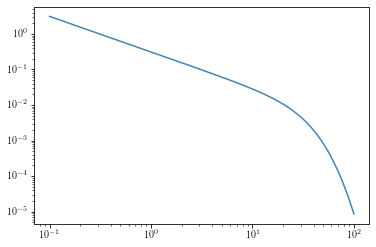

In [5]:
plt.plot(arr.T[0],arr.T[1])
plt.yscale('log')
plt.xscale('log')